# Titanic Problem

# Business Understanding

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1,502 out of 2,224 passengers and crew members. 
This sensational tragedy shocked the international community and eventually, it led to better safety regulations for ships.
In this challenge, we are asked to predict whether a passenger on the titanic would have been survived or not.

#  Data Understanding 

There are three csv files (train.csv,test.csv and gender_submission.csv) that is used for understanding the data based on our problem.
We use training data set for our machine learning models and provide the outcome(also known as the 'ground truth') for each passenger.
Our model will be based on "features" like passengers' gender and class.So, We consider for feature engineering to create new features.
I have considered test data set that is used to see how well my model performs on unseen data.For the test set, I do not provide the ground truth for each passenger.
For each passenger in the test set, use the model my trained to predict whether or not they survived the sinking of the Titanic.
In addition , gender_submission.csv, a set of predictions that assume all and only female passengers survive that can be used as a submission file.

## Data Dictionary

survival :  Survival (0 = No, 1 = Yes)
pclass   :  Ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)(1st = Upper,2nd = Middle,3rd = Lower)
sex      :  Sex
Age      :  Age in years((Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5))
sibsp    :  of siblings / spouses aboard the Titanic
parch    :  of parents / children aboard the Titanic
ticket   :  Ticket number
fare     :  Passenger fare
cabin    :  cabin number
embarked :  Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)

Importing the library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer # one hot encoding
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from matplotlib import pyplot

/home/curiousgirl/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
train_dataset=pd.read_csv('train.csv')
test_dataset=pd.read_csv('test.csv')

In [3]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train_dataset.shape

(891, 12)

Here is 891 rows and 12 columns.

In [7]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Understanding

### Univariate Analysis

## To understand the categorical varibles by using bar plot.

survived categorical variable to consider the predict outcome which is either survived or not.

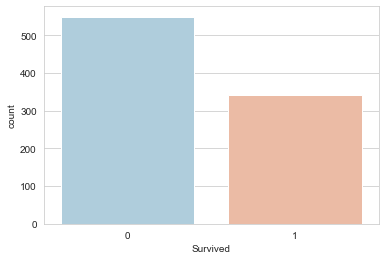

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data= train_dataset, palette='RdBu_r')

In this bar plot,the number of alive people is less than the number of death people.

how many male and female are survived or not by using bar plot.

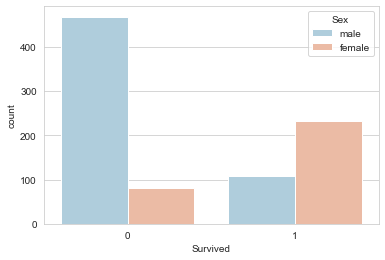

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data= train_dataset, palette='RdBu_r')

Numbers of male death are more than the numbers of female death.

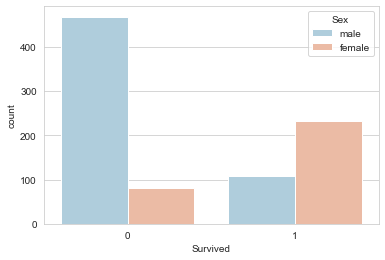

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data= train_dataset, palette='RdBu_r')

How many type of classes are survived or not.

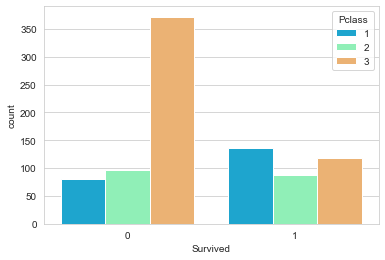

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data= train_dataset, palette='rainbow')

How many Parch variables are survived or not.

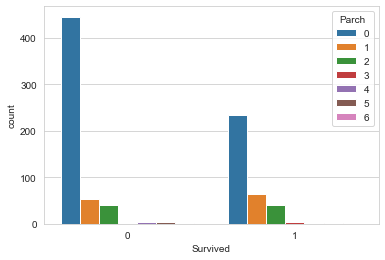

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Parch',data= train_dataset)

How many embarked variable has survived or not.

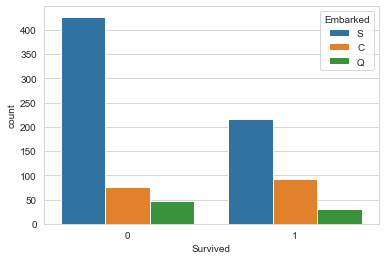

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data= train_dataset)

Looking at all the plots,the number of survived passenger's lives are less than unsurvived passenger's lives in this tragic incident.

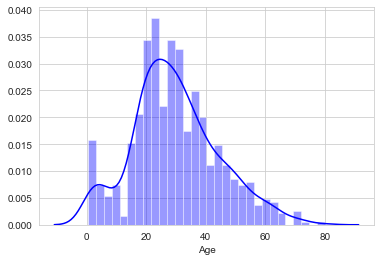

In [14]:
sns.distplot(train_dataset['Age'],color='blue',bins=30)

The mean age of people on board was 29-30 with a standard deviation of slightly over 0.30. The distribution for age is extremely right-skewed and slightly left-skewed.It has an outlier.

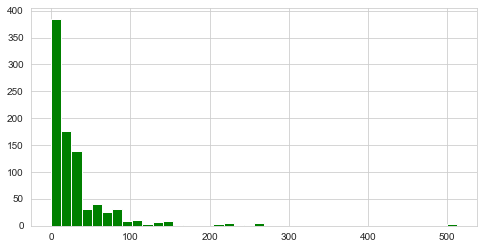

In [15]:
train_dataset['Fare'].hist(color='green',bins=40,figsize=(8,4))

Looking at Fare data is highly right-skewed with a few outliers.

Checking null variables in train_dataset 

In [16]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
test_dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
train_dataset['Cabin'].value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
E101               3
C22 C26            3
F2                 3
F33                3
E25                2
E67                2
C124               2
B51 B53 B55        2
B57 B59 B63 B66    2
C126               2
B58 B60            2
C68                2
C2                 2
E121               2
D33                2
B22                2
E33                2
C78                2
E44                2
C125               2
C92                2
D36                2
B28                2
D26                2
B20                2
F4                 2
                  ..
C104               1
D56                1
D7                 1
C85                1
C50                1
A26                1
D11                1
A16                1
A5                 1
D19                1
D46                1
C90                1
B42                1
B39                1
C30                1
D15                1
B102         

In [19]:
test_dataset.dropna(subset=['Fare'],axis=0)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [20]:
test_dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Removed 'age' outlier treatment

In [21]:
data = [train_dataset, test_dataset]
for dataset in data:
    mean = train_dataset["Age"].mean()
    std = test_dataset["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
train_dataset["Age"].isnull().sum()
test_dataset["Age"].isnull().sum()

0

Here, Age, Cabin and Embarked data have null variables.Age data is numeric variable so I applied impute function using mean to replace null value.Cabin and Embarked data are categorical varirables by replacing mode instead of null value.

Solved an outlier value in 'Fare' column.

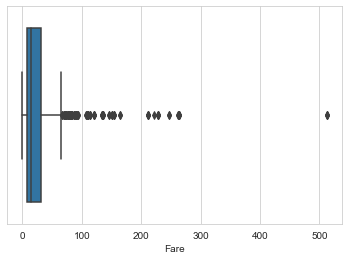

In [22]:
sns.boxplot('Fare',data = train_dataset)

Calculated 'Fare' upper bound

In [23]:
titanic_dataset=[train_dataset,test_dataset]
for dataset in titanic_dataset:
    q1, q3 = np.percentile(dataset['Fare'],[25,75])
    IQR = q3-q1   
    UTV = q3 + 1.5*IQR
    dataset['Fare'] = dataset['Fare'].mask(dataset['Fare']>UTV,UTV)
    dataset["Fare"] = train_dataset["Fare"].astype(int)
print('Fare data in train dataset :  ', train_dataset["Fare"].isnull().sum())
print('Fare data in test dataset  :  ' ,test_dataset['Fare'].isnull().sum())

Fare data in train dataset :   0
Fare data in test dataset  :   0


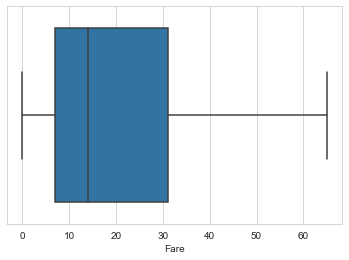

In [24]:
sns.boxplot('Fare',data = train_dataset)

### Bivariate Analysis

Checking the relation between two numeric variables using correlation 

In [25]:
corrmax=round(train_dataset.corr(),2)

In [26]:
top_corr_features=corrmax.index

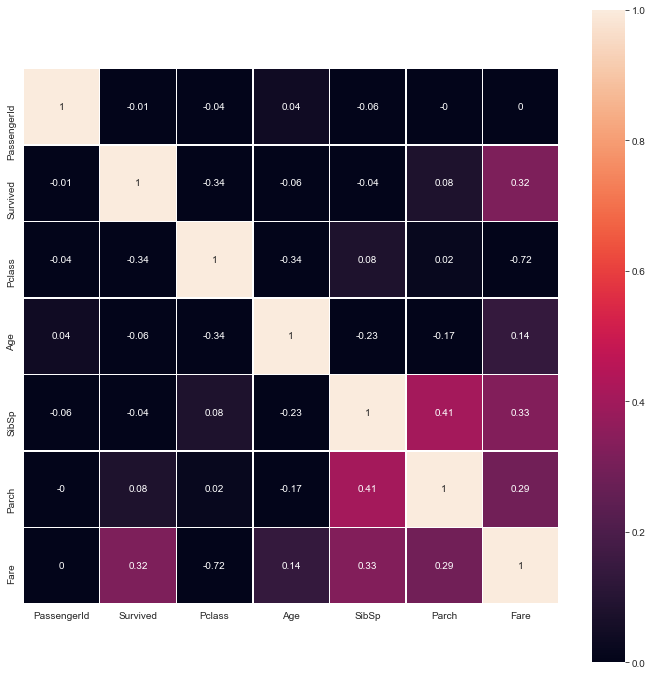

In [27]:
fig,ax=plt.subplots(figsize=(12,12))
sns.heatmap(corrmax,vmin=0,vmax=1,square=True,annot=True,linewidth=.5)

There's no strong correlation between any two variables.

## Convert Categorical Variables into Numeric Variables

In [28]:
train_dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare             int64
Cabin           object
Embarked        object
dtype: object

In [29]:
test_dataset.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare             int64
Cabin           object
Embarked        object
dtype: object

Binning/Converting Numerical Age to Categorical Variable
feature vector map:
child: 0
young: 1
adult: 2
mid-age: 3
senior: 4

In [32]:
titanic_dataset=[train_dataset,test_dataset]
for dataset in titanic_dataset:
    dataset.loc[ dataset['Age'] <= 15, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 30), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 45), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <= 60), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 4

float64


Here Name, Sex and Ticket data need to convert numeric varaibles by using dummy variables

Dropping PassengerId,Name,Ticket columns in a given dataset because they occur huge number of columns after converting the numeric values that might occur an underfitting while training the model.

In [33]:
new_train=train_dataset.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [34]:
new_test=test_dataset.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

Here converting categorical Pclass,Sex,SibSp,Parch,Embarked column

In [35]:
genders = {"male": 0, "female": 1}
titanic_dataset = [new_train, new_test]

for dataset in titanic_dataset:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [36]:
# Checking Null value in Embarked data

In [37]:
new_train['Embarked'].isnull().sum()

2

In [38]:
embarkerd_data = {"C": 0, "S": 1,"Q":2}
titanic_dataset = [new_train, new_test]

for dataset in titanic_dataset:
    dataset['Embarked']=dataset['Embarked'].replace(to_replace = np.nan, value = 'S') 
    dataset['Embarked'] = dataset['Embarked'].map(embarkerd_data)

In [39]:
new_train['Embarked'].head(10)

0    1
1    0
2    1
3    1
4    1
5    2
6    1
7    1
8    1
9    0
Name: Embarked, dtype: int64

In [40]:
new_train['Pclass'].value_counts()
### Converting categorical variables into one hot encoding
new_train.groupby('Pclass').size()
## convert the data type to category
new_train['Pclass'] = new_train['Pclass'].astype('category')
new_train['Pclass_cat'] = new_train['Pclass'].cat.codes
new_train.groupby(['Pclass', 'Pclass_cat']).size()
df_one_hot = new_train.copy()
lb = LabelBinarizer()
lb_results = lb.fit_transform(df_one_hot['Pclass'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
lb_results_df.head()
## concatenate this data to our data set
new_train_final = pd.concat([df_one_hot, lb_results_df], axis=1)
print('original df dimensions:', new_train.shape)
print('one hot encoded df dimensions:', new_train_final.shape)
new_test.head()

original df dimensions: (891, 9)
one hot encoded df dimensions: (891, 12)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,2.0,0,0,7,2
1,3,1,3.0,1,0,65,1
2,2,0,4.0,0,0,7,2
3,3,0,1.0,0,0,53,1
4,3,1,1.0,1,1,8,1


In [41]:
new_test['Pclass'].value_counts()
### Converting categorical variables into one hot encoding
new_test.groupby('Pclass').size()
## convert the data type to category
new_test['Pclass'] = new_test['Pclass'].astype('category')
new_test['Pclass_cat'] = new_test['Pclass'].cat.codes
new_test.groupby(['Pclass', 'Pclass_cat']).size()
df_one_hot = new_test.copy()
lb = LabelBinarizer()
lb_results = lb.fit_transform(df_one_hot['Pclass'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
lb_results_df.head()
## concatenate this data to our data set
new_test_final = pd.concat([df_one_hot, lb_results_df], axis=1)
print('original df dimensions:', new_test.shape)
print('one hot encoded df dimensions:', new_test_final.shape)
new_test.head()

original df dimensions: (418, 8)
one hot encoded df dimensions: (418, 11)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_cat
0,3,0,2.0,0,0,7,2,2
1,3,1,3.0,1,0,65,1,2
2,2,0,4.0,0,0,7,2,1
3,3,0,1.0,0,0,53,1,2
4,3,1,1.0,1,1,8,1,2


In [42]:
new_train_final['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [43]:
new_train_final['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [44]:
# Combined  SibSp and Parch those are relationship with each other
titanic_dataset = [new_train_final, new_test_final]
for dataset in titanic_dataset:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] == 0, 'relatives'] = 0
    dataset.loc[dataset['relatives'] > 1, 'relatives'] = 1
    dataset['relatives'] = dataset['relatives'].astype(int)
new_train_final['relatives'].value_counts()

0    537
1    354
Name: relatives, dtype: int64

In [45]:
new_train_final = new_train_final.drop(['SibSp','Parch'], axis=1)
new_test_final = new_test_final.drop(['SibSp','Parch'], axis=1)

Evaluate Algorithms
a) Split-out training and validation datasets
 We create a training dataset (variable name "training") and a validation dataset (variable name "validation")

In [46]:
startTimeScript = datetime.now()

In [47]:
new_train_final.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Pclass_cat,1,2,3,relatives
0,0,3,0,1.0,7,1,2,0,0,1,1
1,1,1,1,2.0,65,0,0,1,0,0,1
2,1,3,1,1.0,7,1,2,0,0,1,0


In [48]:
new_test_final.head(3)

,Pclass,Sex,Age,Fare,Embarked,Pclass_cat,1,2,3,relatives
0,3,0,2.0,7,2,2,0,0,1,0
1,3,1,3.0,65,1,2,0,0,1,1
2,2,0,4.0,7,2,1,0,1,0,0


In [49]:
seedNum = 777
X_train = new_train_final.drop('Survived', axis=1)
Y_train = new_train_final['Survived']
X_train.shape, Y_train.shape

((891, 10), (891,))

In [50]:
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_train.shape: (891, 10) Y_train.shape: (891,)
Total time for data handling and visualization: 0:00:01.350351


In [51]:
num_folds = 10
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression(random_state=seedNum)))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(random_state=seedNum)))
models.append(('BT', BaggingClassifier(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
models.append(('ET', ExtraTreesClassifier(random_state=seedNum)))
models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))

results = []
names = []
metrics = []

for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=num_folds, random_state=seedNum)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print ('Model training time:',(datetime.now() - startTimeModule))
print ('Average metrics ('+scoring+') from all models:',np.mean(metrics))

LR: 0.775531 (0.034821)
Model training time: 0:00:00.119244
CART: 0.817104 (0.031879)
Model training time: 0:00:00.078032
NB: 0.738627 (0.055061)
Model training time: 0:00:00.069870
KNN: 0.781211 (0.028759)
Model training time: 0:00:00.121595
SVM: 0.785668 (0.032475)
Model training time: 0:00:00.453743
BT: 0.811473 (0.019039)
Model training time: 0:00:00.352535
RF: 0.808115 (0.019991)
Model training time: 0:00:00.262810
ET: 0.805893 (0.030535)
Model training time: 0:00:00.214211
AB: 0.796879 (0.033350)
Model training time: 0:00:01.386460
GBM: 0.833920 (0.029897)
Model training time: 0:00:01.377737
Average metrics (accuracy) from all models: 0.7954419475655431


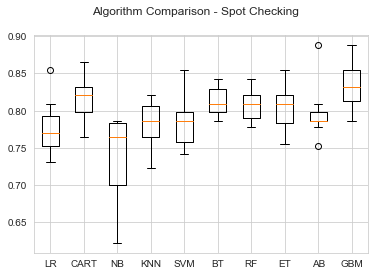

In [52]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [53]:
results = []
names = []
# Tuning algorithm #1 - AdaBoost
startTimeModule = datetime.now()
paramGrid4 = dict(n_estimators=np.array([500,600,700,800,900]))
model4 = AdaBoostClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid4 = GridSearchCV(estimator=model4, param_grid=paramGrid4, scoring=scoring, cv=kfold)
grid_result4 = grid4.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))
results.append(grid_result4.cv_results_['mean_test_score'])
names.append('AB')
means = grid_result4.cv_results_['mean_test_score']
stds = grid_result4.cv_results_['std_test_score']
params = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.809203 using {'n_estimators': 600}
0.806958 (0.029566) with: {'n_estimators': 500}
0.809203 (0.033622) with: {'n_estimators': 600}
0.808081 (0.034536) with: {'n_estimators': 700}
0.809203 (0.030474) with: {'n_estimators': 800}
0.806958 (0.029137) with: {'n_estimators': 900}
Model training time: 0:01:40.571923


In [54]:
# Tuning algorithm #2 - Stochastic Gradient Boosting
startTimeModule = datetime.now()
paramGrid5 = dict(n_estimators=np.array([400,500,600,700,800]))
model5 = GradientBoostingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid5 = GridSearchCV(estimator=model5, param_grid=paramGrid5, scoring=scoring, cv=kfold)
grid_result5 = grid5.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result5.best_score_, grid_result5.best_params_))
results.append(grid_result5.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result5.cv_results_['mean_test_score']
stds = grid_result5.cv_results_['std_test_score']
params = grid_result5.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.829405 using {'n_estimators': 800}
0.827160 (0.024232) with: {'n_estimators': 400}
0.826038 (0.024863) with: {'n_estimators': 500}
0.822671 (0.026149) with: {'n_estimators': 600}
0.827160 (0.021567) with: {'n_estimators': 700}
0.829405 (0.027965) with: {'n_estimators': 800}
Model training time: 0:00:43.285461


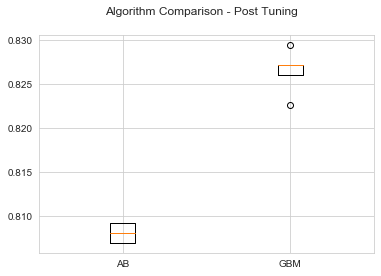

In [55]:
# 5.b) Compare Algorithms After Tuning
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [58]:
X_test=new_test_final.values

model = GradientBoostingClassifier(n_estimators=800, random_state=seedNum)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
submission = pd.DataFrame({
        "PassengerId": test_dataset["PassengerId"],
        "Survived": predictions
    })

submission.to_csv('submission.csv', index=False)

In [59]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
